In [76]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Instructions

## **Assignment Instructions**

* **How to install 'otter'**: Run `pip install otter-grader` in your Anaconda Command Prompt
* **Otter**: It is an autograder that we will be using for grading your notebooks.
* **grader.check('qn')**: This command runs test cases for nth question `qn` provided to you and displays the result. But these are not the only test cases, these are provided just for your basic testing. There will be some *hidden test cases* on which your answers will be tested as well.
* You are **not** allowed to edit any pre-defined variables and as per the instructions for every question you have to assign your answers to these variables.
* Write your answers in place of `...` where prompted

## **Submission Instructions**

* There are two parts of this assignment. You should name both notebooks as **YourRollNumber_PartNumber.ipynb**. (e.g. this part should be named as *`2XXXXXXX_1.ipynb`*)
* You must submit a zip file containg just two notebooks and it must not has any folder or any other file. 
* The name of the zip file must be your `Roll Number`

## **Grading**

Grading is broken down into autograded answers and free response.

* For autograded answers, the results of your code are compared to provided and/or hidden tests.
* There are default assignments in some questions, storing the state of the dataframes at the time of that particular question in '*#_q#*' variables. Do NOT change any of these assignments as they are used by the auto-grader to check your answers.
* For free response, readers will evaluate how well you answered the question and/or fulfilled the requirements of the question.

### **Importing Libraries**

In [77]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
import matplotlib.pyplot as plt
plots.style.use('fivethirtyeight')
import seaborn as sns

# The Framingham Heart Study

The [Framingham Heart Study](https://en.wikipedia.org/wiki/Framingham_Heart_Study) is an observational study of cardiovascular health. Cardiovascular disease is one of the leading causes of death in the United States, as you will see in tomorrow’s homework. The initial study followed over 5,000 volunteers for several decades, and followup studies even looked at their descendants. In this lab, we'll investigate some of its key findings about diet, cholesterol, and heart disease.

Run the cell below to examine data for almost 4,000 subjects from the first wave of the study, collected in 1956.

### **Loading Data**

In [78]:
framingham = pd.read_csv('framingham.csv')
framingham

,AGE,SYSBP,DIABP,TOTCHOL,CURSMOKE,DIABETES,GLUCOSE,DEATH,ANYCHD
0,39,106.0,70.0,195.0,0,0,77.0,0,1
1,46,121.0,81.0,250.0,0,0,76.0,0,0
2,48,127.5,80.0,245.0,1,0,70.0,0,0
3,61,150.0,95.0,225.0,1,0,103.0,1,0
4,46,130.0,84.0,285.0,1,0,85.0,0,0
...,...,...,...,...,...,...,...,...,...
3837,51,126.5,80.0,207.0,1,0,68.0,1,0
3838,48,131.0,72.0,248.0,1,0,86.0,1,0
3839,52,133.5,83.0,269.0,0,0,107.0,0,1
3840,40,141.0,98.0,185.0,0,0,72.0,0,0


Each row contains data from one subject. The first seven columns describe the subject at the time of their initial medical exam at the start of the study. The last column, `ANYCHD`, tells us whether the subject developed some form of heart disease at any point after the start of the study.

You may have noticed that the table contains fewer rows than subjects in the original study: this is because we are excluding subjects who already had heart disease as well as subjects with missing data.

### Section 1: Diabetes and the population

Before we begin our investigation into cholesterol, we'll first look at some limitations of this dataset. In particular, we will investigate ways in which this is or isn't a representative sample of the population by examining the number of subjects with diabetes.

[According to the CDC](https://www.cdc.gov/diabetes/statistics/slides/long_term_trends.pdf), the prevalence of diagnosed diabetes (i.e., the proportion of the population who have it) in the U.S. around this time was 0.0093. We are going to conduct a hypothesis test with the following null and alternative hypotheses:

**Null Hypothesis**: The probability that a participant within the Framingham Study has diabetes is equivalent to the prevalence of diagnosed diabetes within the population. (i.e., any difference between the study prevalence and population prevalence is due to random chance in the selection of the participants).

**Alternative Hypothesis**: The probability that a participant within the Framingham Study has diabetes is different than the prevalence of diagnosed diabetes within the population.

We are going to use the absolute distance between the observed prevalence and the true population prevalence as our test statistic. The column `DIABETES` in the `framingham` table contains a 1 for subjects with diabetes and a `0` for those without.

**Question 1**: What is the observed value of the statistic in the data from the Framingham Study?

<!--
BEGIN QUESTION
name: q1
points: 2
-->

In [1]:
observed = np.count_nonzero(framingham.DIABETES == 1) / 4000
observed_diabetes_distance = abs(observed - 0.0093)

NameError: name 'np' is not defined

In [80]:
grader.check("q1")

All tests passed!

**Question 2**: The array `diabetes_proportions` contains the proportions of the population without and with diabetes. Define the function `diabetes_statistic`, which should return exactly one simulated statistic under the null hypothesis. Remember that our statistic is the absolute distance between the observed prevalence and the true population prevalence.

**IMPORTANT NOTE:** Look into the [np.random.multinomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multinomial.html) function for simulating the statistic.


<!--
BEGIN QUESTION
name: q2
points: 2
-->

In [81]:
diabetes_proportions = [.9907, .0093]

def diabetes_statistic():
    simulated_stat = np.random.multinomial(4000, diabetes_proportions).item(1)
    return abs(simulated_stat/4000 - 0.0093)

x = diabetes_statistic()

In [82]:
grader.check("q2")

All tests passed!

**Question 3**: Complete the following code to simulate 5000 values of the statistic under the null hypothesis.

<!--
BEGIN QUESTION
name: q3
points: 2
-->

In [83]:
diabetes_simulated_stats = []

for i in np.arange(5000): 
    simulated_stat = diabetes_statistic()
    diabetes_simulated_stats = np.append(diabetes_simulated_stats, simulated_stat)

<!-- BEGIN QUESTION -->


**Question 4**: Generate a histogram of the simulated values of your statistic, along with the observed value.

*Explain what this histogram displays.*

<!--
BEGIN QUESTION
name: q4
points: 8
manual: true
-->

In [2]:
sns.histplot(diabetes_simulated_stats, color='m', edgecolor='k', binwidth = 0.0004)
plt.axvline(0.0093, color='b', linestyle='dashed', linewidth=2)

#it displays the frequency of the distance values of diabetes stimulated stats we generated

NameError: name 'sns' is not defined

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 5**: Based on the results of the test and the empirical distribution of the test statistic under the null, should you reject the null hypothesis?

*Answering Guidelines:* a placeholder for your answer has been made - simply add your answer in the markdown cell below as instructed.

<!--
BEGIN QUESTION
name: q5
points: 2
manual: true
-->

The null hypothesis would be rejected here as the observed value is far away from the simulated values.This shows us that it is not by chance that the observed value is what it is

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 6**: Why might there be a difference between the population and the sample from the Framingham Study? Your explanations **must be possible and consistent** with the observed data and hypothesis test results.

**Before thinking of possible reasons, make you sure you go through the following:** 

(For representation in medical study samples, you can read these recent articles from [NPR](https://www.npr.org/sections/health-shots/2015/12/16/459666750/clinical-trials-still-dont-reflect-the-diversity-of-america) and [Scientific American](https://www.scientificamerican.com/article/clinical-trials-have-far-too-little-racial-and-ethnic-diversity/)).

<!--
BEGIN QUESTION
name: q6
points: 2
manual: true
-->

The sample taken for Framingham's study was not a simple random sample but a convinience sample. Therefore the people selected in it would not be represenative of the true population. The people who volunteered for it might all be healthy. Or most of them could be young. The people would not be from all different backgrounds and races as some factions of the american population would not have participated. 

<!-- END QUESTION -->



### Section 2: Cholesterol and Heart Disease

In the remainder of this question, we are going to examine one of the main findings of the Framingham study: an association between serum cholesterol (i.e., how much cholesterol is in someone's blood) and whether or not that person develops heart disease. [These sections](https://www.inferentialthinking.com/chapters/12/Comparing_Two_Samples.html) of the textbook should be helpful for the rest of the lab if you run into difficulties.

We'll use the following null and alternative hypotheses:

**Null Hypothesis:** In the population, the cholesterol levels of people who get heart disease come from the same distribution as the cholesterol levels of people who do not.

**Alternative Hypothesis:** The cholesterol levels of people in the population who get
heart disease are higher, on average, than the cholesterol level of people who do not.



**Question 7:** From the provided Null and Alternative Hypotheses, does it seem reasonable to use A/B Testing to determine which model is more consistent? Assign the variable `ab_reasonable` to `True` if it seems reasonable and `False` otherwise.

<!--
BEGIN QUESTION
name: q7
points: 2
-->

In [85]:
ab_reasonable = True
ab_reasonable 

True

In [86]:
grader.check("q7")

All tests passed!

To test our hypothesis, we’ll generally want to use a test statistic where larger values of the test statistic will point towards the alternative. 

<!-- BEGIN QUESTION -->

**Question 8:** Now that we have a null hypothesis, we need a test statistic. Explain and justify your choice of test statistic in two sentences or less.

*Hint: Remember that larger values of the test statistic should favor the alternative over the
null.*

<!--
BEGIN QUESTION
name: q8
points: 2
manual: true
-->

We will calculate the difference between average cholestrol value of those with heart disease and those with no heart disease. The difference if positive would indicate alternative hypothesis 

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 9:** Write a function that computes your test statistic. It should take a table with two columns, TOTCHOL and ANYCHD, and compute the test statistic you described above.

<!--
BEGIN QUESTION
name: q9
points: 2
manual: true
-->

In [87]:
def compute_framingham_test_statistic(tbl):
    new_tbl = tbl.groupby('ANYCHD')['TOTCHOL'].mean()
    chol_heart = new_tbl[1]
    chol_noheart = new_tbl[0]
    return chol_heart - chol_noheart


<!-- END QUESTION -->

**Question 10:** Use the function you defined above to compute the observed test statistic, and assign it to the name framingham_observed_statistic.

<!--
BEGIN QUESTION
name: q10
points: 2
-->

In [88]:
framingham_observed_statistic = compute_framingham_test_statistic(framingham)
framingham_observed_statistic

16.635919905689406

Now that we have defined hypotheses and a test statistic, we are ready to conduct a hypothesis test. We'll start by defining a function to simulate the test statistic under the null hypothesis, and then use that function 1000 times to understand the distribution under the null hypothesis.

**Question 11**: Write a function to simulate the test statistic under the null hypothesis. 

The `simulate_framingham_null` function should simulate the null hypothesis once (not 1000 times) and return the value of the test statistic for that simulated sample.

<!--
BEGIN QUESTION
name: q11
points: 2
-->

In [93]:
def simulate_framingham_null():
    shuffled_tbl = framingham.sample(frac = 1, replace=False)[['TOTCHOL']]
    shuffled_tbl.reset_index(inplace=True, drop=True)
    sample_tbl = framingham.drop(columns=['TOTCHOL'])
    sample_tbl['TOTCHOL'] = shuffled_tbl    
    sample_mean = sample_tbl.groupby('ANYCHD')['TOTCHOL'].mean()
    chol_noheart = sample_mean[0]
    chol_heart = sample_mean[1]
    simulated_value = chol_heart - chol_noheart
    return simulated_value

# Run your function once to make sure that it works.
simulate_framingham_null()

2.2016738096482413

**Question 12**: Fill in the blanks below to complete the simulation for the hypothesis test. Your simulation should compute 1000 values of the test statistic under the null hypothesis and store the result in the array framingham_simulated_stats.

*Hint*: You should use the function you wrote above in Question 4.

*Note*: Warning: running your code might take a few minutes!  We encourage you to check your `simulate_framingham_null()` code to make sure it works correctly before running this cell. 

<!--
BEGIN QUESTION
name: q12
points: 2
-->

In [94]:
framingham_simulated_stats = []
for i in np.arange(1000):
    x = simulate_framingham_null()
    framingham_simulated_stats = np.append(framingham_simulated_stats, x)

In [95]:
grader.check("q12")

All tests passed!

<!-- BEGIN QUESTION -->

**Question 13**: Generate a histogram of the simulated values of your statistic, along with the observed value.

*Explain what this histogram displays.*

<!--
BEGIN QUESTION
name: q13
points: 2
manual: true
-->

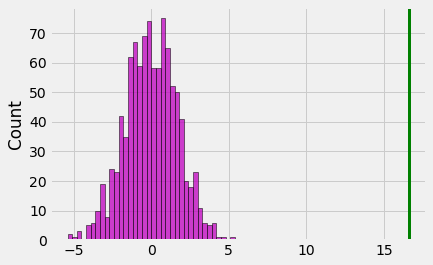

In [96]:
sns.histplot(framingham_simulated_stats, color='m', edgecolor='k', binwidth = 0.3)
plt.axvline(framingham_observed_statistic, color='g', linestyle='solid', linewidth=3)
plt.show()

#the green line displays the observed value while the histogram displays the frequency distribution of difference between mean value of cholestrol of people with heart diseases and and no heart diseases

<!-- END QUESTION -->

**Question 14**: Compute the p-value for this hypothesis test, and assign it to the name `framingham_p_value`.

*Hint*: One of the key findings of the Framingham study was a strong association between cholesterol levels and heart disease. If your p-value doesn't match up with this finding, you may want to take another look at your test statistic and/or your simulation.

<!--
BEGIN QUESTION
name: q14
points: 2
-->

In [97]:
framingham_p_value = np.count_nonzero(framingham_simulated_stats >= framingham_observed_statistic)/4000
framingham_p_value

0.0

In [98]:
grader.check("q14")

All tests passed!

<!-- BEGIN QUESTION -->

**Question 15**: Despite the Framingham Heart Study's well-deserved reputation as a well-conducted and rigorous study, it has some major limitations. Discuss with a neighbor and give one specific reason why it can't be used to say that high cholesterol *causes* heart disease.

<!--
BEGIN QUESTION
name: q15
points: 2
manual: true
-->

*Our hypothesis cannot conclusively point out if cholestrol is the primary reason for heart diseases as heart disease have a lot of other factors such as physical fitness so it cannot be established if cholestrol causes heart diseases*

Similar studies from the 1950s found positive associations between diets high in saturated fat, high cholesterol, and incidence of heart disease. In 1962, the U.S. Surgeon General said:

*"Although there is evidence that diet and dietary habits may be implicated in the development of coronary heart disease and may be significant in its prevention or control, at present our only research evidence is associative and not conclusive."*

Congratulations, you're done with part 1! Be sure to

- **run all the tests** (the next cell has a shortcut for that),
- **run the last cell to submit your work**
- **take a break! :)**

### Further reading

If you're interested in learning more, you can check out this article:

* [Origin story of the Framingham Heart Study](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1449227/)

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [99]:
grader.check_all()

q1:

    All tests passed!
    

q12:

    All tests passed!
    

q14:

    All tests passed!
    

q2:

    All tests passed!
    

q7:

    All tests passed!